In [8]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv('./data/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
# Keep the  mouth in Date
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df= df.drop(columns=['Date'])
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,6
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,6
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,6
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,6


In [6]:
for col in df.columns:
    print(df[col].dtype)
    

object
float64
float64
float64
float64
float64
object
float64
object
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
object
int64


In [9]:
# Label encoding
label = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label.fit_transform(df[col])
df
                                

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,12
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,12
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,12
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,12
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,NaN,NaN,0,31.0,9,1,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,6
145456,41,3.6,25.3,0.0,NaN,NaN,6,22.0,9,3,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,6
145457,41,5.4,26.9,0.0,NaN,NaN,3,37.0,9,14,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,6
145458,41,7.8,27.0,0.0,NaN,NaN,9,28.0,10,3,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6


In [10]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
count,145460.000000,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,145460.000000,135197.000000,145460.000000,145460.000000,...,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,23.793524,12.194034,23.221348,2.360918,5.468232,7.611178,8.306565,40.035230,7.943826,8.002317,...,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,0.264004,0.264066,6.399615
std,14.228687,6.398495,7.119049,8.478060,4.193704,3.785483,4.971722,13.607062,4.921740,4.739865,...,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,0.489024,0.489138,3.427262
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000,0.000000,1.000000
25%,11.000000,7.600000,17.900000,0.000000,2.600000,4.800000,4.000000,31.000000,3.000000,4.000000,...,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000,0.000000,3.000000
50%,24.000000,12.000000,22.600000,0.000000,4.800000,8.400000,9.000000,39.000000,8.000000,8.000000,...,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000,0.000000,6.000000
75%,36.000000,16.900000,28.200000,0.800000,7.400000,10.600000,13.000000,48.000000,12.000000,12.000000,...,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.000000,0.000000,9.000000
max,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,16.000000,135.000000,16.000000,16.000000,...,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2.000000,2.000000,12.000000


<Axes: xlabel='Evaporation', ylabel='count'>

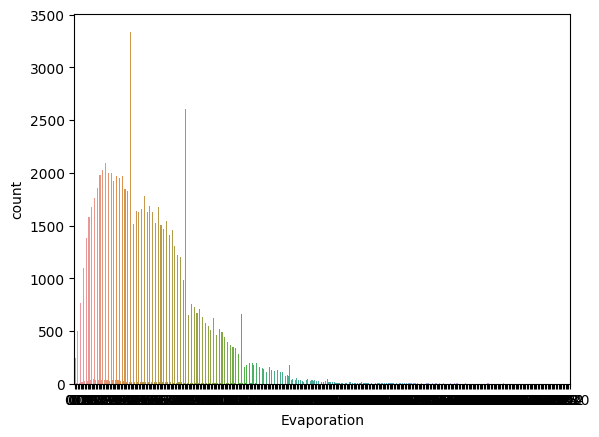

In [11]:
# Using seaborn to plot the instances of Evaporation
sns.countplot(x='Evaporation', data=df)
